In [52]:
# load libraries
#%matplotlib inline
import numpy as np
import datetime as dt

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import matplotlib.dates as mdates

import pickle

# List of FIPS state ids
states = ['01', '03', '04', '05', '06', '08', '09', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', 
         '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', 
         '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
          '54', '55', '56']

#       ,'02', '15'] 

# Dictionary connecting state names and FIPS ids
states_dict = {'Alabama':'01', 'Arizona':'03', 'Arkansas':'05', 'California':'06', 'Colorado':'08', 
              'Connecticut':'09', 'Delaware':'10', 'District of Columbia':'11', 'Florida':'12',
              'Georgia':'13', 'Idaho':'16', 'Illinois':'17', 'Indiana':'18', 'Iowa':'19', 'Kansas':'20',
              'Kentucky':'21', 'Louisiana':'22', 'Maine':'23', 'Maryland':'24', 'Massachusetts':'25',
              'Michigan':'26', 'Minnesota':'27', 'Mississippi':'28', 'Missouri':'29', 'Montana':'30',
              'Nebraska':'31', 'Nevada':'32', 'New Hampshire':'33', 'New Jersey':'34', 'New Mexico':'35',
              'New York':'36', 'North Carolina':'37', 'North Dakota':'38', 'Ohio':'39', 'Oklahoma':'40',
              'Oregon':'41', 'Pennsylvania':'42', 'Rhode Island':'44', 'South Carolina':'45', 
              'South Dakota':'46', 'Tennessee':'47', 'Texas':'48', 'Utah':'49', 'Vermont':'50',
              'Virginia':'51', 'Washington':'53', 'West Virginia':'54', 'Wisconsin':'55', 'Wyoming':'56'}

#              'Alaska':'02', 'Hawaii':'15'}

In [53]:
# Read in gdf with geo, pop and covid data from pickle file

with open('us_county_geo_pop_covid_gdf.pickle', 'rb') as f:
    gdf = pickle.load(f)

fips = '53033'
gdf[gdf['fips']==fips]

,fips,state_code,county_code,county_name,geometry,population,2020-01-21,2020-01-22,2020-01-23,2020-01-24,...,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29
2935,53033,53,033,King,"MULTIPOLYGON (((-122.48499 47.51273, -122.4678...",2252782,0,0,0,0,...,"{'cases': 9167, 'deaths': 603}","{'cases': 9236, 'deaths': 602}","{'cases': 9275, 'deaths': 604}","{'cases': 9371, 'deaths': 606}","{'cases': 9504, 'deaths': 606}","{'cases': 9614, 'deaths': 608}","{'cases': 9697, 'deaths': 609}","{'cases': 9821, 'deaths': 612}","{'cases': 9903, 'deaths': 612}","{'cases': 10071, 'deaths': 612}"


In [54]:
# Here is a simple example of plotting case and death data for King County - First we pull data from gdf

# Get dates from the names of the columns starting at column-6
dates = gdf.columns.values.tolist()[6:]
    
# Get the row index of the relevant value of fips
idx = gdf.index[gdf['fips']==fips][0]
    
# Read the case and death data from that row into a list
data = gdf.iloc[idx,6:].values.tolist()
    
# On each day, the relevant data is stored in a dictionary, so I save the relevant case/death data into 
# their own arrays
cases = np.zeros(len(dates), int)
deaths = np.zeros(len(dates), int)
    
# Loop over the dates to fill the case and death arrays
for i in range(len(dates)):
    if data[i] == 0:
        cases[i] = 0
        deaths[i] = 0
    else:
        cases[i] = int(data[i]['cases'])
        deaths[i] = int(data[i]['deaths'])

# Convert dates to floats
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

# Get a list of xticks for the plot
xticks = [d for d in x_dates[0::7]]
    
# Process raw data
cases_new = [cases[i+1]-cases[i] for i in range(0,len(cases)-1)]
deaths_new = [deaths[i+1]-deaths[i] for i in range(0,len(deaths)-1)]
cases_total = cases[len(cases)-1]
deaths_total = deaths[len(deaths)-1]

# Grab population and county name
population = gdf.iat[idx,5]
county = gdf.iat[idx,3]

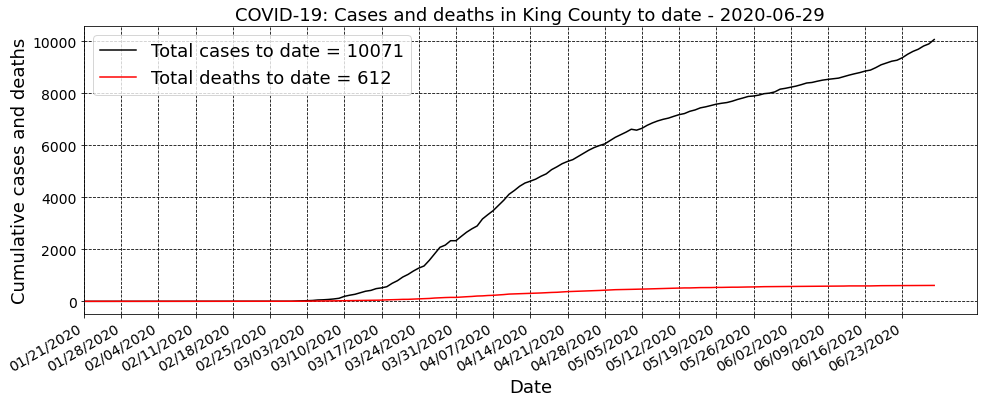

In [55]:
date = str(x_dates[len(x_dates)-1])
#print('date =',date)

# Create plotting figure *****************************************
fig = plt.figure(figsize=(16, 20))

# Plot axes *****************************************
ax1 = plt.subplot(311, xlabel='Date', 
                  #ylim=(-10, 10),
                  #xlim=(0,1),
                  ylabel='Cumulative cases and deaths',
                  title='COVID-19: Cases and deaths in {} County to date - {}'.format(county, date)
                  )

#ax2 = ax1.twinx()
#ax2.set_ylabel('# of deaths')

# Format plot
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax1.set_xticks(xticks)

# Set font size for text in axes
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(18)

ax1.tick_params(axis='both',labelsize=14)
ax1.grid(True, linestyle='--', color='black')

# parameter dictionaries
cases_dict = {'label':'Total cases to date = {}'.format(cases_total), 'marker':'', 'color':'black'}
deaths_dict = {'label':'Total deaths to date = {}'.format(deaths_total), 'marker':'', 'color':'red'}

# Plot
ax1.plot(x_dates, cases, **cases_dict )
ax1.plot(x_dates, deaths, **deaths_dict )

# More formatting
ax1.set_xlim(left=dt.date(2020,1,21))
ax1.legend(loc='upper left', fontsize=18)

fig.autofmt_xdate()
plt.show()

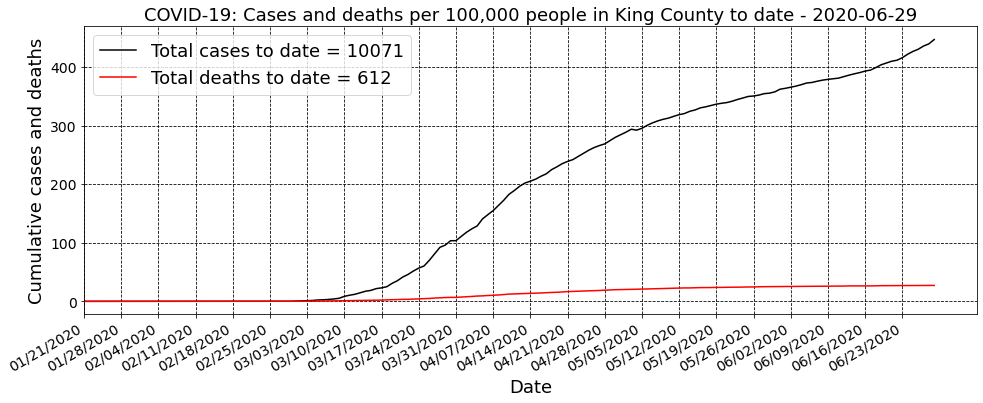

In [56]:
cases = 100000*cases/population
deaths = 100000*deaths/population

date = str(x_dates[len(x_dates)-1])
#print('date =',date)

# Create plotting figure *****************************************
fig = plt.figure(figsize=(16, 20))

# Plot axes *****************************************
ax1 = plt.subplot(311, xlabel='Date', 
                  #ylim=(-10, 10),
                  #xlim=(0,1),
                  ylabel='Cumulative cases and deaths',
                  title='COVID-19: Cases and deaths per 100,000 people in {} County to date - {}'.format(county, date)
                  )

#ax2 = ax1.twinx()
#ax2.set_ylabel('# of deaths')

# Format plot
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax1.set_xticks(xticks)

# Set font size for text in axes
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(18)

ax1.tick_params(axis='both',labelsize=14)
ax1.grid(True, linestyle='--', color='black')

# parameter dictionaries
cases_dict = {'label':'Total cases to date = {}'.format(cases_total), 'marker':'', 'color':'black'}
deaths_dict = {'label':'Total deaths to date = {}'.format(deaths_total), 'marker':'', 'color':'red'}

# Plot
ax1.plot(x_dates, cases, **cases_dict )
ax1.plot(x_dates, deaths, **deaths_dict )

# More formatting
ax1.set_xlim(left=dt.date(2020,1,21))
ax1.legend(loc='upper left', fontsize=18)

fig.autofmt_xdate()
plt.show()

In [21]:
gdf.iloc[idx].population

2252782

In [64]:
gdf.iloc[2935,100]['cases']


5691

In [57]:
for idx in range(len(gdf.index)):
    for i in range(len(dates)):
    
        if gdf.iloc[idx,i+6] != 0:
            gdf.iloc[idx, i+6]['cases_per_100000'] = 100000*gdf.iloc[idx,i+6]['cases']/gdf.iloc[idx].population
            gdf.iloc[idx, i+6]['deaths_per_100000'] = 100000*gdf.iloc[idx,i+6]['deaths']/gdf.iloc[idx].population
        

In [58]:
gdf[gdf['fips']==fips]

,fips,state_code,county_code,county_name,geometry,population,2020-01-21,2020-01-22,2020-01-23,2020-01-24,...,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29
2935,53033,53,033,King,"MULTIPOLYGON (((-122.48499 47.51273, -122.4678...",2252782,0,0,0,0,...,"{'cases': 9167, 'deaths': 603, 'cases_per_1000...","{'cases': 9236, 'deaths': 602, 'cases_per_1000...","{'cases': 9275, 'deaths': 604, 'cases_per_1000...","{'cases': 9371, 'deaths': 606, 'cases_per_1000...","{'cases': 9504, 'deaths': 606, 'cases_per_1000...","{'cases': 9614, 'deaths': 608, 'cases_per_1000...","{'cases': 9697, 'deaths': 609, 'cases_per_1000...","{'cases': 9821, 'deaths': 612, 'cases_per_1000...","{'cases': 9903, 'deaths': 612, 'cases_per_1000...","{'cases': 10071, 'deaths': 612, 'cases_per_100..."


In [48]:
len(gdf.index)

3108

In [59]:
#gdf[2925:2945]

In [60]:
gdf.iloc[2935,166]

{'cases': 10071,
 'deaths': 612,
 'cases_per_100000': 447.04725091020794,
 'deaths_per_100000': 27.16641024297957}

In [65]:
len(dates)

161

In [68]:
gdf.iloc[2935,len(dates)+5]['cases_per_100000'] = cases[len(dates)-1]

In [69]:
gdf.iloc[2935,166]

{'cases': 10071,
 'deaths': 612,
 'cases_per_100000': 447.04725091020794,
 'deaths_per_100000': 27.16641024297957}